In [1]:
import pandas as pd
import numpy as np 

In [2]:
# View the data
df_orig = pd.read_csv("london_weather.csv")

df_orig.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Create a copy of the dataframe
df = df_orig.copy()
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
# Check if there exists any missing value in our dataframe
df_orig.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

### Handle Missing Data

In [5]:
# Cloud cover
df["cloud_cover"] = df["cloud_cover"].fillna(df["cloud_cover"].mean())

# Global Radiation
df["global_radiation"] = df["global_radiation"].fillna(df["global_radiation"].mean())

# Maximum Temperature
df["max_temp"] = df["max_temp"].fillna(df["max_temp"].mean())

# Mean Temperature
df["mean_temp"] = df["mean_temp"].fillna(df["mean_temp"].mean())

# Minimum Temperature
df["min_temp"] = df["min_temp"].fillna(df["min_temp"].mean())

# Precipitation
df["precipitation"] = df["precipitation"].fillna(df["precipitation"].mean())

# Pressure
df["pressure"] = df["pressure"].fillna(df["pressure"].mean())


# Snow Depth
df["snow_depth"] = df["snow_depth"].fillna(df["snow_depth"].mean())

In [6]:
# Check if there exists any missing value in our dataframe
df.isnull().sum()


date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [29]:
# Convert the date column to a datetype column
df["date"] = pd.to_datetime(df["date"], format='%Y%m%d')

# Extract the dates from this column
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# Drop the date column
df = df.drop("date", axis=1)

In [30]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,flood,year,month,day
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,0,1979,1,1
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,0,1979,1,2
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,0,1979,1,3
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,0,1979,1,4
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,0,1979,1,5


### Visualize the Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df["precipitation"].tail(n=10)

15331     0.6
15332     1.8
15333     0.0
15334     0.0
15335    12.0
15336     2.0
15337     0.2
15338     0.0
15339     0.0
15340     0.0
Name: precipitation, dtype: float64

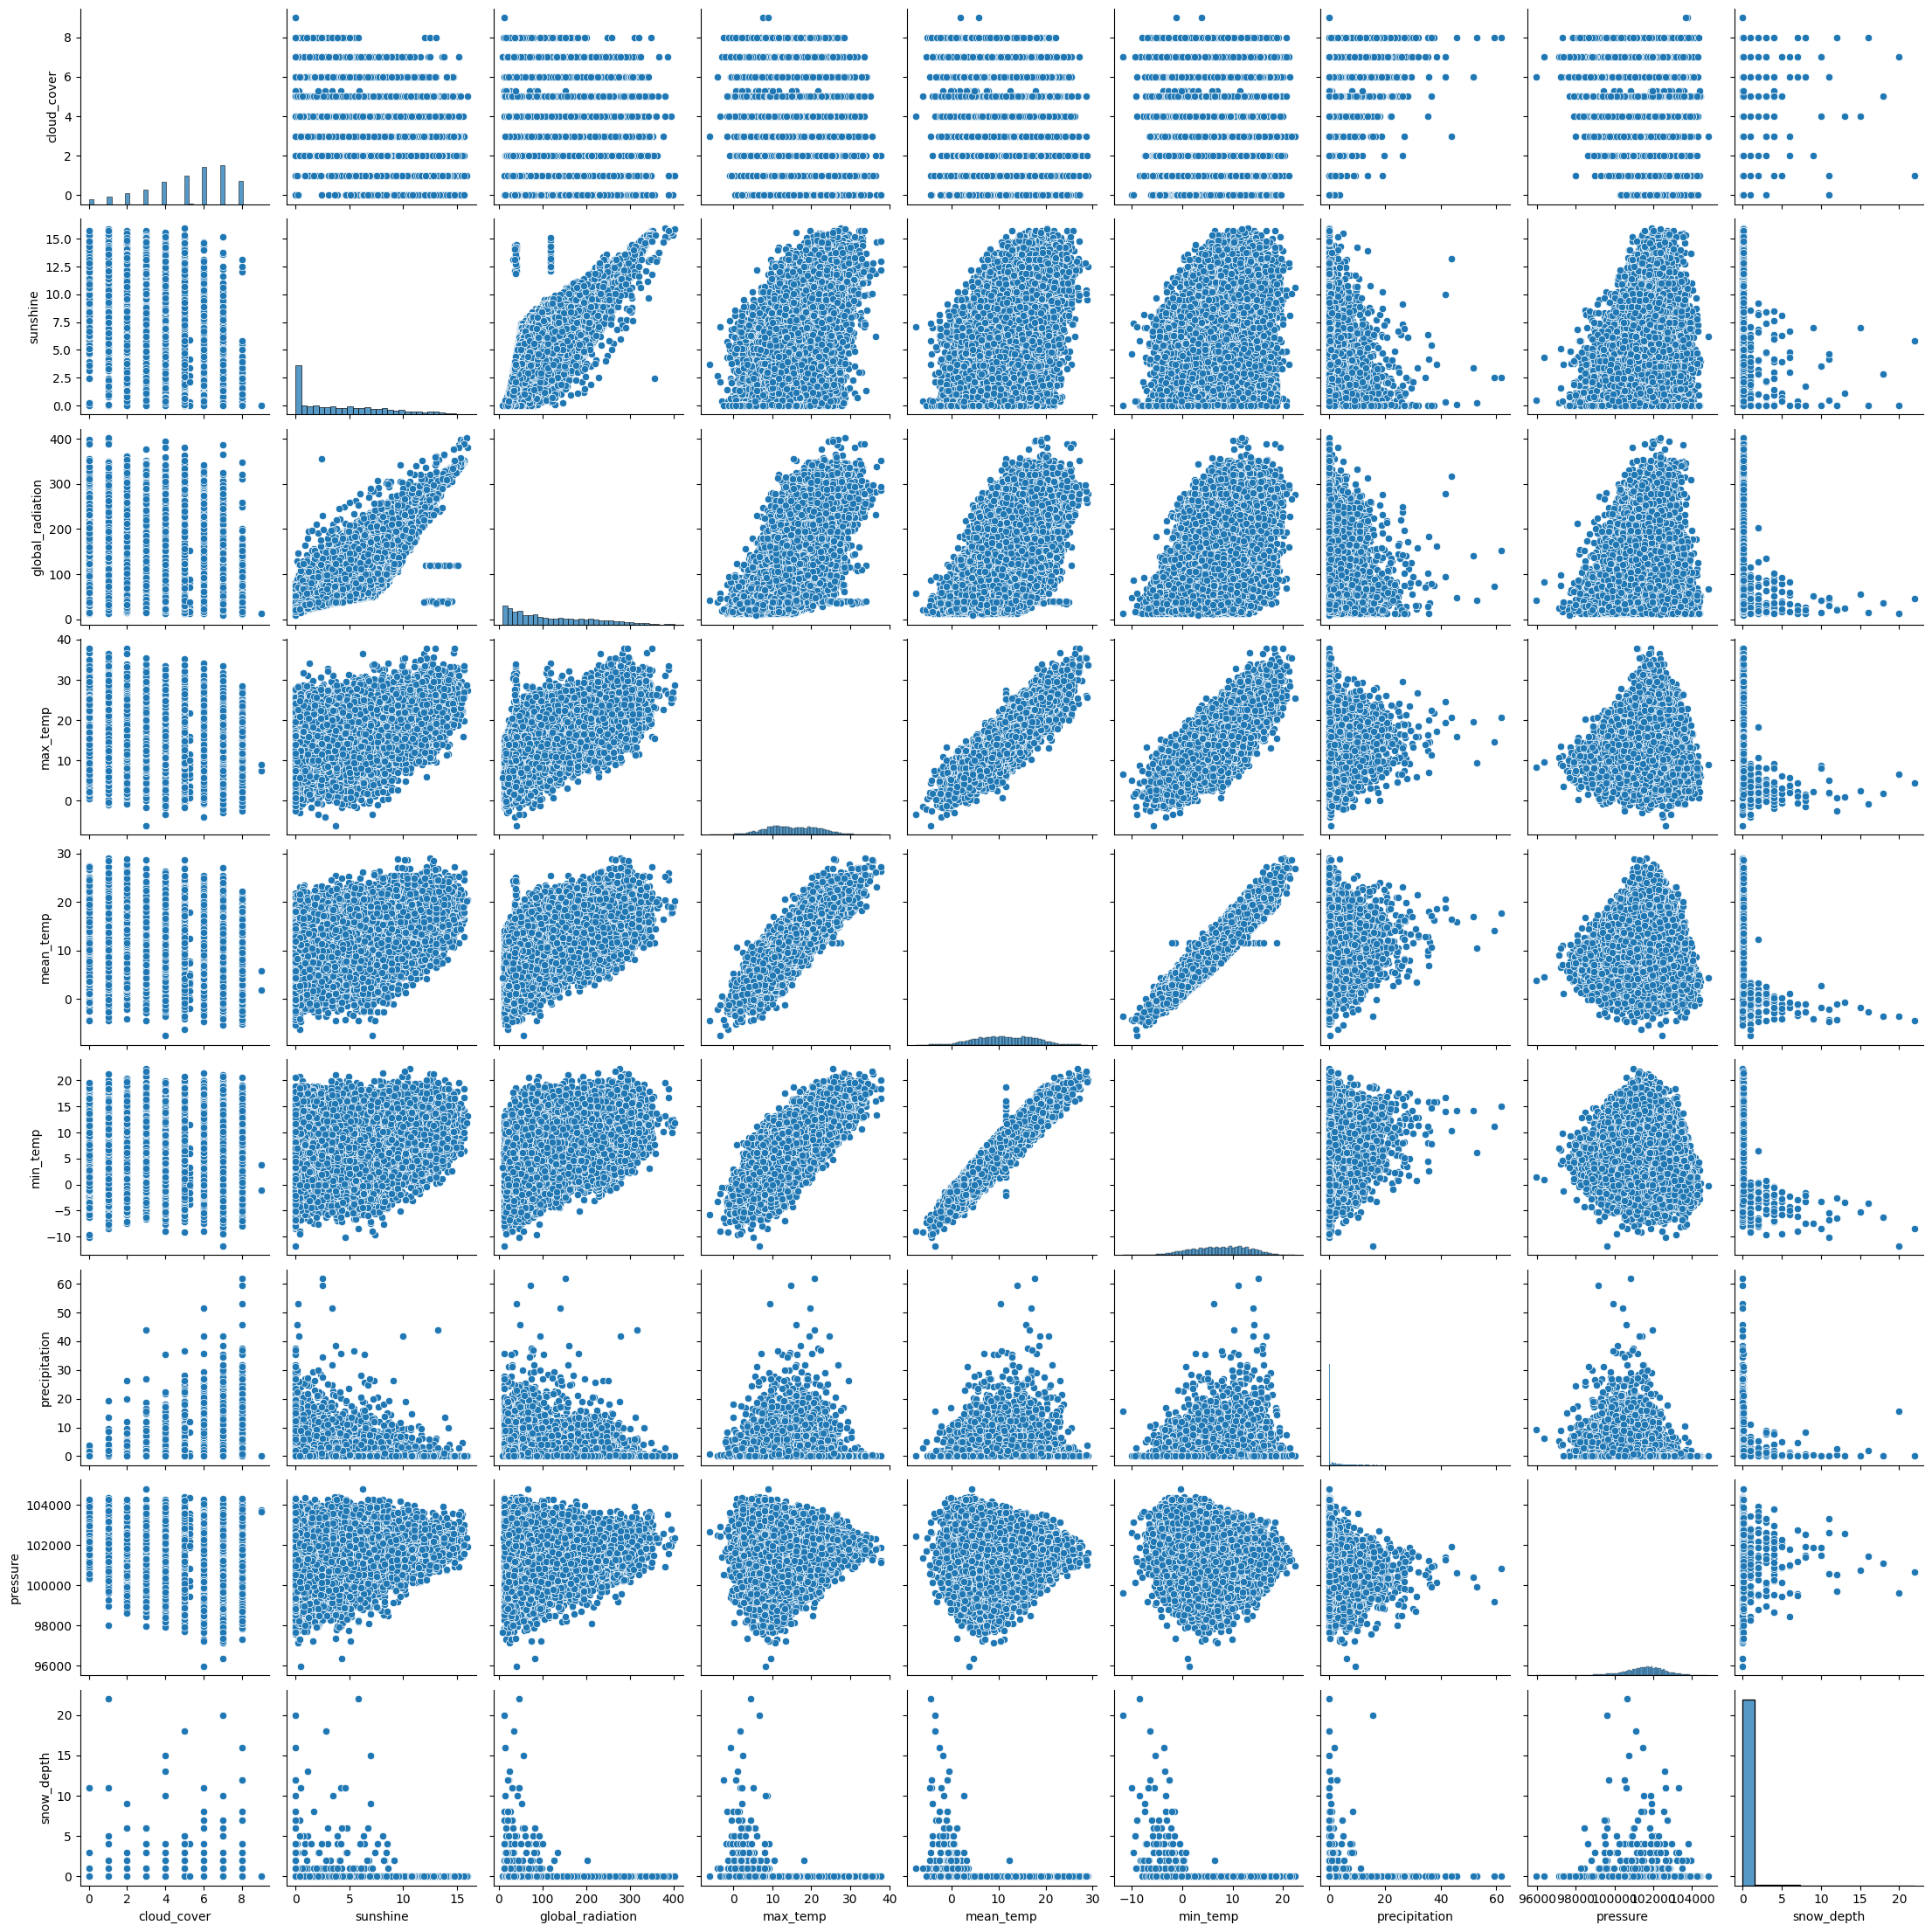

In [11]:
# Visualize how all the features correlate to each other
sns.pairplot(data=df)

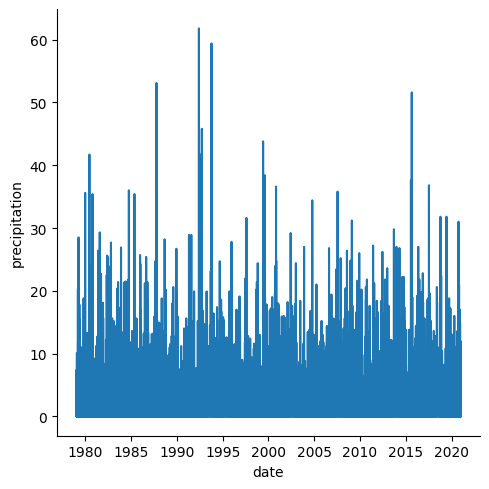

In [12]:
sns.relplot(data=df, x="date", y="precipitation", kind='line')

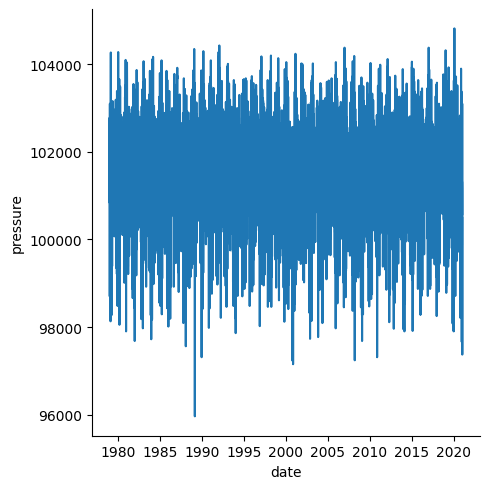

In [13]:
sns.relplot(data=df, x="date", y="pressure", kind='line')

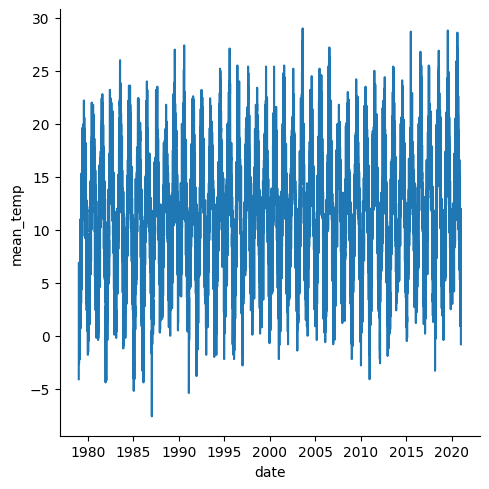

In [14]:
sns.relplot(data=df, x="date", y="mean_temp", kind='line')

### Predicting Flood Occurrence

In [15]:
# Create a target column (flood)
def flood_value(precipitation):
  if precipitation >= 40:
    return 2
  elif 25 < precipitation < 40:
    return 1
  else:
    return 0

df["flood"] = df["precipitation"].apply(flood_value)

In [16]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,flood
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,0


In [31]:
# Split the data
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = df.drop("flood", axis=1)
y = df["flood"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
X_train.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month,day
1758,6.0,0.5,37.0,14.2,8.3,3.2,0.0,103050.0,0.000000,1983,10,25
11882,3.0,9.3,264.0,25.3,17.6,11.5,0.0,101870.0,0.037986,2011,7,14
10607,1.0,4.9,49.0,9.5,6.4,3.3,0.2,99280.0,0.000000,2008,1,16
852,6.0,5.7,192.0,9.2,7.8,5.0,0.0,101530.0,0.000000,1981,5,2
1494,4.0,1.7,40.0,8.9,2.6,-0.5,0.0,102800.0,0.000000,1983,2,3


In [20]:
y_test.head()

9261     0
5376     0
12578    0
927      0
14109    0
Name: flood, dtype: int64

### Scale the numerical values

In [23]:
# from sklearn.preprocessing import StandardScaler

# # Initiate the scaler
# sc = StandardScaler()

# # Fit and transform the features
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier as KNN


# Initiate the model
knn = KNN(n_neighbors=7)

# Fit the model
knn.fit(X_train, y_train)

# Check score
knn.score(X_test, y_test)

0.9967412557028025